## Neural Network Training

Now that we have seen how a neural network is represented, we can go on to see how exactly it works. Since there are many layers having many neurons, there exists a complex set of weights to get an output from some input variables. Each weight in this network can be changed and hence there are countless configurations a neural network can have.

A **trained** neural network has weights configuration which accurately predicts correct outputs for some input data. And that is what we ultimately hope to achieve. We will now go through how exactly a neural network trains itself to get this desirable weight configuration.

### Backpropagation
Backpropagation is the name of the algorithm a neural network uses to train itself. This revolutionary algorithm is a mixture of the **chain rule in derivation** and **gradient descent**, the common optimization algorithm used in linear and logistic regression.

To understand how backpropagation works, first we have to understand the relationship between the output and the weights in between. It is clear that every weight in the neural network will affect the output in some way due to the way the neural network is connected. Due to this fact, we can say that if I **change** a particular weight, the output will **change** in some way. We can also find the exact mathematical equation defining the relationship between each weight and the output.

<center><img src="img/backprop_1.png" alt="Dataset with three input features" width="500" height="233" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 15.</b> A dataset with three input features (X1, X2, and X3) </i></p>

Let’s say we are given a dataset with three input features, ($x_1$, $x_2$ and $x_3$) and we need to find the relationship between the input features and the output using a neural network. We will now see what exactly the neural network does.

#### Minimize the error

<center><img src="img/backprop_2.png" alt="error between the output and expected value" width="580" height="301" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 16.</b> Feed the neural network and measure the error between the output and expected value</i></p>

First step is to feed in the data and getting the output from the neural network. We shall call the output, `Y_pred`. Next we should compare the predicted value with the actual value. This value will be called the error. It is essentially how bad or how far off the model is from predicting the values correctly. Our goal is to now **minimize the error**.

Since `Y_pred` is a function of all the weights in the model and `Error` is a function of `Y_pred`, we can say that the `Error` will also depend on the weights. This means that we need to adjust our weights in such a way that the error is minimized. We do that using **partial derivatives**.

Let’s take a simple example of an equation, $y = w_1*x_1 + w_2*x_2$. If we find the partial derivative of $w_1$ or $w_2$ with respect to $y$, we can find out how $w_1$ or $w_2$ can affect $y$.

If the partial derivative of $w_1$ with respect to $y$ is **POSITIVE**, that means **DECREASING** the weight will **DECREASE** $y$.

If the partial derivative of $w_1$ with respect to $y$ is **NEGATIVE**, that means **INCREASING** the weight will **DECREASE** $y$.


<center><img src="img/backprop_3.png" alt="Derivatives measure the slope" width="500" height="294" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 17.</b> Derivatives measure the slope and in which direction to descent in order to change the output value</i></p>

These two rules are all we need to optimize the weights in the neural network. We need to find the **partial derivative of the error** with respect to every weight. If that partial derivative is **positive**, then we **decrease** the value of that weight so that error gets decreased. If that partial derivative is **negative**, then we **increase** that weight so that the error gets decreased. This is the basic underlying concept of how weights are updated after we calculate the error.

Since the last layer is the closest to the error, we will first derive the last layer with respect to the error and update those weights. Then we will move to the second last layer to do the same and so on and so forth. We repeat this process till we reach the first layer and all the weights are updated. This entire process is called **backpropagation**.

<center><img src="img/backprop_4.gif" alt="Backpropagation" width="640" height="480" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 18.</b> Backpropagation - Derive and update</i></p>

We perform backpropagation for a single row of data and update the weights. We then repeat for all the data available in the training data set, this entire cycle is called **one epoch**. Usually neural networks can take several epochs to train and it is up to us to decide how many epochs it will train for.

## Mathematical explanation

Let's say we have a neural network with 4 layers, each of them 1 neuron.

Let's name the output of each layer $a^{(L)}$, $a^{(L-1)}$, $a^{(L-2)}$, $a^{(L-3)}$

<center><img src="img/backprop_10.png" alt="Backpropagation Simple NN" width="500" height="154" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 19.</b> Simple network with 4 neurons</i></p>

The desired output $y$ is $1$.

So the cost of this simple network is:
$$ C_0 = (a^{(L)} - y)^2$$

where $C_0$ is the cost for single training example.

<center><img src="img/backprop_11.png" alt="Backpropagation Cost calculation" width="500" height="251" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 20.</b> Cost calculation</i></p>

The last ouput $a^{(L)}$ is calculated by next formula:
$$a^{(L)} = \sigma(w^{(L)} a^{(L-1)} + b^{(L)}) $$

where $\sigma$ is the activation function (e.g. *sigmoid* or *ReLU*)

For the sake of clarity let's name the input for the activation function $z$ :
$$z^{(L)} = w^{(L)} a^{(L-1)} + b^{(L)} $$

$$a^{(L)} = \sigma(z^{(L)}) $$

So, now we need to identify the importance of each weight $w$ to the cost. Because by modifying the weights we can modify (minimize) the cost. To do this we need to calculate the derivative of $w^{(L)}$ w.r.t $C_0$.

$$ \frac{dC_0}{dw^{(L)}}$$

Using the **Chain Rule** we directly come up with:


$$ \frac{dC_0}{dw^{(L)}} = \frac{dz^{(L)}}{dw^{(L)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

This would give us the sensitivity of $C$ to small changes in $w^{(L)}$.

Now, let's calculate all the three derivatives, starting from the last one:

$$ \frac{dC_0}{da^{(L)}} = \frac{d(a^{(L)} - y)^2}{da^{(L)}} = 2(a^{(L)} - y) $$

The derivative of $a^{(L)}$ w.r.t $z^{(L)}$ is simply the derivative of the activation function:

$$ \frac{da^{(L)}}{dz^{(L)}} =  \frac{d\sigma(z^{(L)})}{dz^{(L)}} =   \sigma ' (z^{(L)}) $$

And the derivative of $z^{(L)}$ w.r.t $w^{(L)}$ comes up to be:

$$ \frac{dz^{(L)}}{dw^{(L)}} = \frac{d(w^{(L)} a^{(L-1)} + b^{(L)})}{dw^{(L)}} = a^{(L-1)} $$

So, finally the derivative of $C_0$ w.r.t to $w^{(L)}$ is:

$$  \boxed{\frac{dC_0}{dw^{(L)}} = a^{(L-1)} \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$


Since we have not a single, but many training examples, the derivative of the full cost function for all examples could simply be calculated as the average of all training examples:

$$ \frac{dC}{dw^{(L)}} = \frac{1}{m} \sum_{i=0}^{m-1}\frac{dC_i}{dw^{(L)}}$$

The sensitivity to the bias is almost identical:


$$ \frac{dC_0}{db^{(L)}} = \frac{dz^{(L)}}{db^{(L)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

and evaluated to:


$$  \boxed{\frac{dC_0}{db^{(L)}} = 1 \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$

Now, we need to see how sensitive is the cost function the output $a^{(L-1)}$ of the previous layer:


$$ \frac{dC_0}{da^{(L-1)}} = \frac{dz^{(L)}}{da^{(L-1)}} \frac{da^{(L)}}{dz^{(L)}} \frac{dC_0}{da^{(L)}}$$

$$  \frac{dz^{(L)}}{da^{(L-1)}} = \frac{d(w^{(L)} a^{(L-1)} + b^{(L)})}{da^{(L-1)}} = w^{(L)}$$

So, this is evaluated to:

$$  \boxed{\frac{dC_0}{da^{(L-1)}} = w^{(L)} \sigma '(z^{(L)}) 2(a^{(L)} - y)}  $$

We can just keep iterating this same **chain rule** idea backwards to see how sensitive the cost function is to previous weights and biases.


<center><img src="img/backprop_12.png" alt="Backpropagation derivatives" width="295" height="538" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 21.</b> Backpropagation - Derive cost sensitivity to previous weights and biases</i></p>

## Implementation

We will implement a simple network with 3 layers:
 * Input layer with 2 nodes
 * Hidden layer with 2 nodes
 * Output layer with 1 node

The size of the dataset would be 33 rows with 2 features each (`years of experience` and `education level`) and 1 target value (`salary`).



<center><img src="img/backprop_13.png" alt="Backpropagation implementation network" width="485" height="284" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 22.</b> Backpropagation - Simple neural network for our salary data</i></p>

### Forward propagation
$$Z^{(1)} = W^{(1)} X + B^{(1)}$$
$$A^{(1)}1 = sigmoid(Z^{(1)})$$
$$Z^{(2)} = W^{(2)} A^{(1)} + B^{(2)}$$
$$A^{(2)} = sigmoid(Z^{(2)})$$


### Backward propagation
$$ Error = (A^{(2)} - Y) ^ 2$$
$$ dA^{(2)} = 2 (A^{(2)} - Y) $$
$$ dZ^{(2)} = sigmoid'(A^{(2)}) dA^{(2)} $$
$$ dW^{(2)} = \frac{1}{n} dZ^{(2)} \cdot A^{(1)^T} $$
$$ dB^{(2)} = \frac{1}{n} \sum dZ^{(2)} $$

$$ dA^{(1)} = W^{(2)^T} \cdot dZ^{(2)}  $$
$$ dZ^{(1)} = sigmoid'(A^{(1)}) dA^{(1)} $$
$$ dW^{(1)} = \frac{1}{n} dZ^{(1)} \cdot A^{(0)} $$

### Variables and its shapes
$$A^{(0)} = X : 33 \times 2 $$
$$Z^{(1)}, A^{(1)} : 2 \times 33 $$
$$Z^{(2)}, A^{(2)}, dA^{(2)}, dZ^{(2)}: 1 \times 33 $$
$$W^{(2)}, dW^{(2)}: 1 \times 2 $$
$$B^{(2)}, dB^{(2)}: 1 \times 1 $$

$$Z^{(1)}, A^{(1)}, dA^{(1)}, dZ^{(1)}: 2 \times 33 $$
$$W^{(1)}, dW^{(1)}: 2 \times 2 $$
$$B^{(1)}, dB^{(1)}: 2 \times 1 $$

In [1]:
import numpy as np              # Numpy is a library for numerical computing
import matplotlib.pyplot as plt # Matplotlib is a library for creating static, animated, and interactive visualizations


# TODO: delete me - Set the float formatter for numpy arrays
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:

# X1 = years of experience
X1 = [1.2, 1.3, 1.5, 1.8, 2, 2.1, 2.2, 2.5, 2.8, 2.9, 3.1, 3.3, 3.5, 3.8, 4, 4.1, 4.5, 4.9, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10, 11, 12, 13, 14, 15]
# X2 = level of education
X2 = [2, 5, 3, 5, 3, 4, 2, 3, 4, 4, 3, 7, 5, 6, 5, 5, 2, 3, 4, 5, 6, 7, 5, 3, 2, 4, 5, 7, 3, 5, 7, 7, 5]
# Y = salary
Y = [2900, 3300, 3100, 4200, 3500, 3800, 3300, 3500, 3750, 4000, 3900, 5300, 4420, 5000, 4900, 5200, 3900, 4800, 5700, 6500, 6930, 7500, 7360, 6970, 6800, 7500, 8000, 9500, 11000, 9500, 12300, 13700, 12500]

# Pandas data frame works with vectorized arrays (33 arrays of 1 element each)
vectorized_X1 = np.array(X1).reshape(-1, 1)
vectorized_X2 = np.array(X2).reshape(-1, 1)
Y_train = np.array(Y).reshape(-1, 1) / 20000  # We divide by 20000 to scale down the output (it must be between 0 and 1)

# Pack the train set
X_train = np.concatenate([vectorized_X1, vectorized_X2], axis=1)

In [3]:

class NeuralNetwork:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        # Initialize weights and biases using random numbers
        self.weights = [np.random.randn(hidden_size, input_size), np.random.randn(output_size, hidden_size)]
        self.biases = [np.zeros((hidden_size, 1)), np.zeros((output_size, 1))]

    def sigmoid(self, X: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X: np.ndarray) -> np.ndarray:
        return X * (1 - X)

    def forward(self, X: np.ndarray, print_values: bool = False) -> list[np.ndarray]:
        z1 = self.weights[0] @ X.T + self.biases[0]
        a1 = self.sigmoid(z1)

        z2 = self.weights[1] @ a1 + self.biases[1]
        a2 = self.sigmoid(z2)

        return [z1, z2], [a1, a2]

    def backward(self, X: np.ndarray, Y: np.ndarray, a: list[np.ndarray]):
        a1 = a[0]
        a2 = a[1]

        # Calculate the error
        error = (a2 - Y.T) ** 2
        n = len(Y)

        dc_da2 = 2 * (a2 - Y.T)                             # Derivative of the error w.r.t. the activation
        dc_dz2 = self.sigmoid_derivative(a2) * dc_da2       # Derivative of the error w.r.t. the delta of the output layer
        dc_dw2 = np.dot(dc_dz2, a1.T) / n                   # Derivative of the error w.r.t. the weights of the output layer
        dc_db2 = np.sum(dc_dz2, axis=1, keepdims=True) / n  # Derivative of the error w.r.t. the biases of the output layer

        dc_da1 = self.weights[1].T @ dc_dz2                 # Derivative of the error w.r.t. the activation of the hidden layer
        dc_dz1 = self.sigmoid_derivative(a1) * dc_da1       # Derivative of the error w.r.t. the delta of the hidden layer
        dc_dw1 = np.dot(dc_dz1, X) / n                      # Derivative of the error w.r.t. the weights of the hidden layer
        dc_db1 = np.sum(dc_dz1, axis=1, keepdims=True) / n  # Derivative of the error w.r.t. the biases of the hidden layer

        return dc_dw1, dc_dw2, dc_db1, dc_db2, error

    def update_weights_and_biases(self, dc_dw1: np.ndarray, dc_dw2: np.ndarray, dc_db1: np.ndarray, dc_db2: np.ndarray, learning_rate: float):
        self.weights[0] -= learning_rate * dc_dw1
        self.weights[1] -= learning_rate * dc_dw2
        self.biases[0] -= learning_rate * dc_db1
        self.biases[1] -= learning_rate * dc_db2
    
    def train(self, X: np.ndarray, Y: np.ndarray, learning_rate: float, epochs: int):
        losses = []
        for epoch in range(epochs):
            z, a = self.forward(X)

            dc_dw1, dc_dw2, dc_db1, dc_db2, error = self.backward(X, Y, a)
            losses.append(np.sum(error))

            # Update the weights and biases
            self.update_weights_and_biases(dc_dw1, dc_dw2, dc_db1, dc_db2, learning_rate)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch} error: {round(np.sum(error), 3)}")
        return losses

Epoch 0 error: 6.222
Epoch 1000 error: 0.168
Epoch 2000 error: 0.034
Epoch 3000 error: 0.023
Epoch 4000 error: 0.021


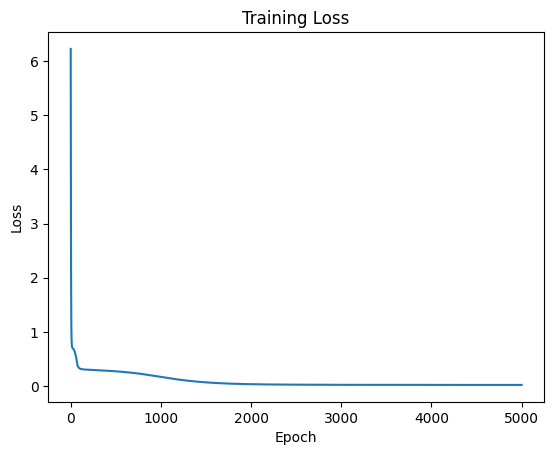

In [4]:
network = NeuralNetwork(2, 2, 1)  # 2 input nodes, 2 hidden nodes, 1 output node
losses = network.train(X_train, Y_train, 0.5, 5000)

# Plot training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

A network with 2 neurons in the hidden layer and 1 neuron in the output layer was constructed. The network was trained for `5000` epochs with a learning rate of `0.5`. These parameters were found with a little trial and error.

Running the example prints the accumulated prediction error. Obviously, the backpropagation works and minimze the error with each epoch going down to `0.021`, which is not bad at all.